In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime as dt

warnings.filterwarnings('ignore')

In [2]:
### load data ###
path='/Users/ajaypatel21/Downloads/'
name='box_office_data_final.csv'
data=pd.read_csv(path+name, index_col='id')
data['new_genres'] = data['new_genres'].apply(lambda x: str(x).strip())
#pd.options.display.max_columns = None
data = data[(data['year'] >= 1990) & (data['year'] < 2020)]
data.shape

(3338, 35)

In [3]:
# set up features and target
# features: runtime, rating, 
features = data[['runtime', 'rating', 'new_genres', 'release_month', 'adj_budget',
                 'dir_pop', 'wr_pop', 'star_power', 'company_size']]
features.head()
targets = data['gross_profit_adj']

In [4]:
# will need to one-hot encode genre, release_month and rating....I also am going to make cosize into a factor
# one-hot rating
features['rating'].value_counts() # going to put not rated->R and G->PG
features['rating'].replace({'G':'PG/G',
                           'PG': 'PG/G',
                           'Not Rated': 'R'},
                          inplace=True)
features['rating'].value_counts()
one_hot_ratings = features['rating'].str.get_dummies()
print(one_hot_ratings.head())

           PG-13  PG/G  R
id                       
tt0035423      1     0  0
tt0099005      0     0  1
tt0099044      0     0  1
tt0099052      1     0  0
tt0099077      1     0  0


In [5]:
# one-hot genre
features['new_genres'].value_counts()
features['new_genres'].replace({'Action': 'Action/Adventure',
                               'Adventure': 'Action/Adventure',
                               'Crime': 'Thriller',
                               'Horror': 'Thriller',
                                'Romance': 'Misc',
                               'Fantasy': 'Action/Adventure',
                               'Sci-Fi': 'Action/Adventure',
                               'Family': 'Misc',
                                'Mystery': 'Thriller',
                               'Biography': 'Drama',
                               'Animation': 'Misc',
                               'History': 'Drama',
                               'Music': 'Drama',
                               'Sport': 'Drama',
                               'War': 'Drama',
                               'Musical': 'Misc',
                               'Western': 'Drama',
                               'Film-Noir': 'Misc'},
                              inplace=True)
features['new_genres'].value_counts()
one_hot_genres = features['new_genres'].str.get_dummies()
print(one_hot_genres.head())

           Action/Adventure  Comedy  Drama  Misc  Thriller
id                                                        
tt0035423                 1       0      0     0         0
tt0099005                 0       0      1     0         0
tt0099044                 0       1      0     0         0
tt0099052                 0       0      0     0         1
tt0099077                 0       0      1     0         0


In [6]:
# one-hot release period
features['release_month'].replace({'January': 'nov_to_jan',
                                  'February': 'feb_to_apr',
                                  'March': 'feb_to_apr',
                                  'April': 'feb_to_apr',
                                  'May': 'may_to_july',
                                  'June': 'may_to_july',
                                  'July': 'may_to_july',
                                  'August': 'aug_to_oct',
                                  'September': 'aug_to_oct',
                                  'October': 'aug_to_oct',
                                  'November': 'nov_to_jan',
                                  'December': 'nov_to_jan'},
                                inplace=True)
features['release_month'].value_counts()
one_hot_release_period = features['release_month'].str.get_dummies()
print(one_hot_release_period.head())

           aug_to_oct  feb_to_apr  may_to_july  nov_to_jan
id                                                        
tt0035423           0           0            0           1
tt0099005           1           0            0           0
tt0099044           0           0            1           0
tt0099052           0           0            1           0
tt0099077           0           0            0           1


In [7]:
# cut and one-hot co size
features['company_size'].quantile([0.25, 0.5, 0,.75]) # cut at 8, 44, 179
features['company_size'] = pd.cut(features['company_size'],
                                  bins=[0,8,44,179, 286],
                                  labels=['small', 'medium', 'large', 'giant'])

one_hot_cosize = features['company_size'].str.get_dummies()
one_hot_cosize.head()

,giant,large,medium,small
id,,,,
tt0035423,0,0,1,0
tt0099005,0,0,1,0
tt0099044,0,0,0,1
tt0099052,0,1,0,0
tt0099077,1,0,0,0


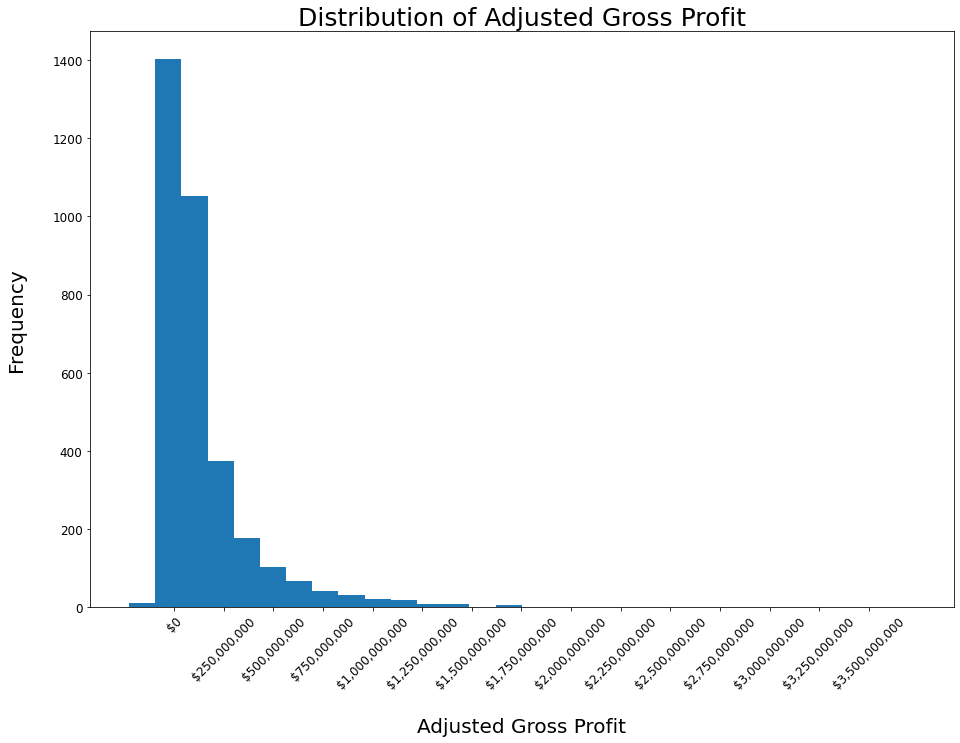

In [8]:
fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 0, 1, 1]);

ax1.hist(targets, bins = 30);
ax1.set_xticks(np.arange(0, targets.max(), 250000000));
ax1.set_xticklabels(ax1.get_xticks(), rotation = 45);
ax1.xaxis.set_major_formatter('${x:,.0f}')

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Distribution of Adjusted Gross Profit', size = 25);
ax1.set_xlabel('\nAdjusted Gross Profit', size = 20);
ax1.set_ylabel('Frequency\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/hist_adj_gross_profit.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

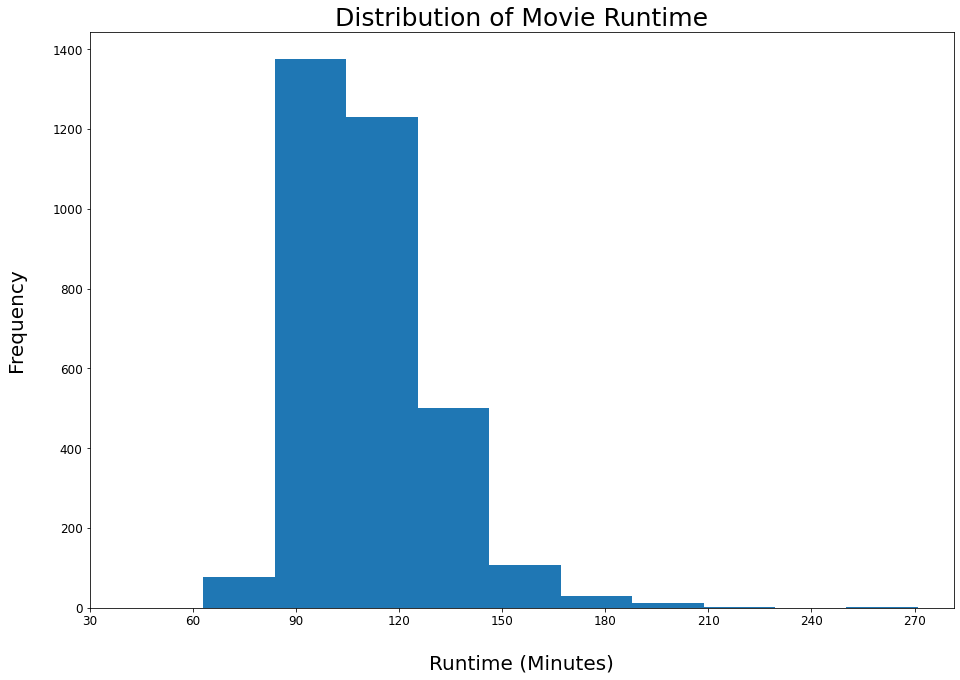

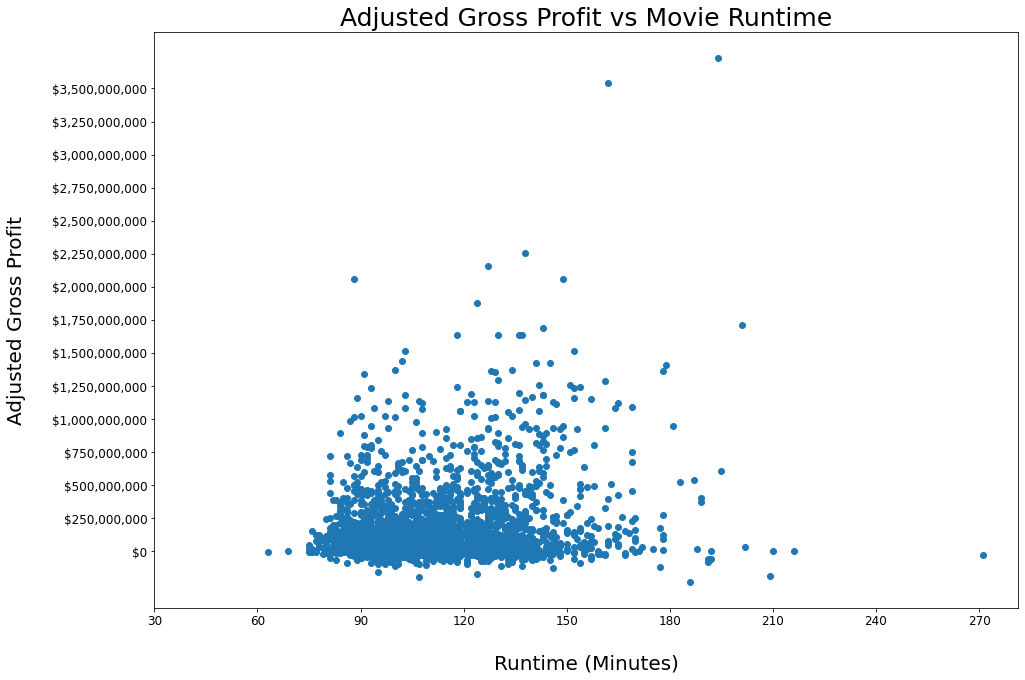

In [9]:
fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 0, 1, 1]);

ax1.hist(features['runtime']);
ax1.set_xticks(np.arange(30, features['runtime'].max(), 30));

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Distribution of Movie Runtime', size = 25);
ax1.set_xlabel('\nRuntime (Minutes)', size = 20);
ax1.set_ylabel('Frequency\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/hist_runtime.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 0, 1, 1]);

ax1.scatter(features['runtime'], targets);
ax1.set_xticks(np.arange(30, features['runtime'].max(), 30));
ax1.set_yticks(np.arange(0, targets.max(), 250000000));
ax1.set_yticklabels(ax1.get_yticks());
ax1.yaxis.set_major_formatter('${x:,.0f}')

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Adjusted Gross Profit vs Movie Runtime', size = 25);
ax1.set_xlabel('\nRuntime (Minutes)', size = 20);
ax1.set_ylabel('Adjusted Gross Profit\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/scatter_runtime.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

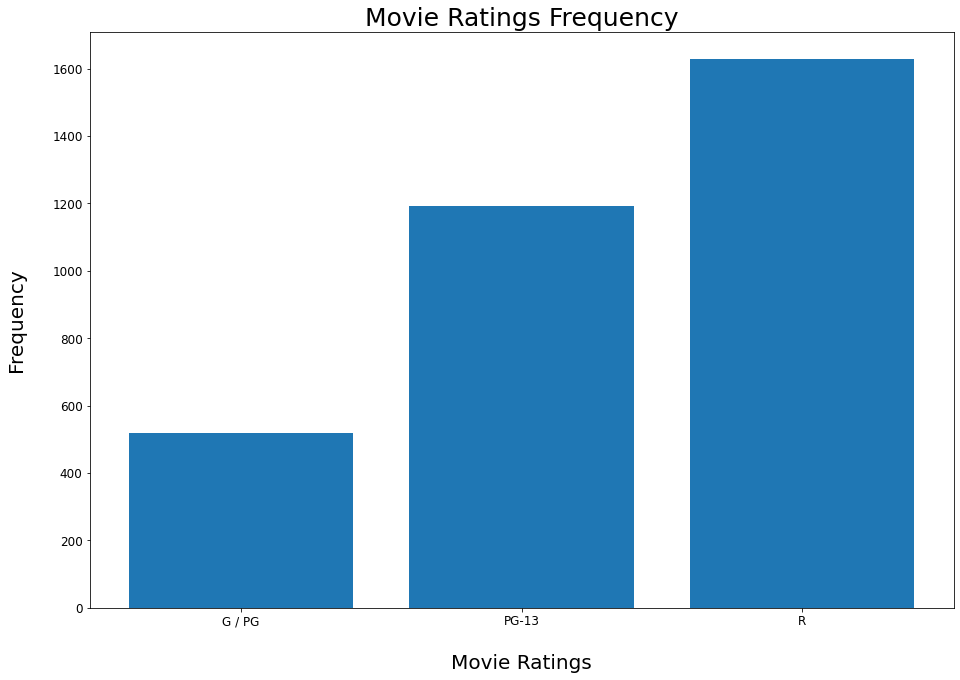

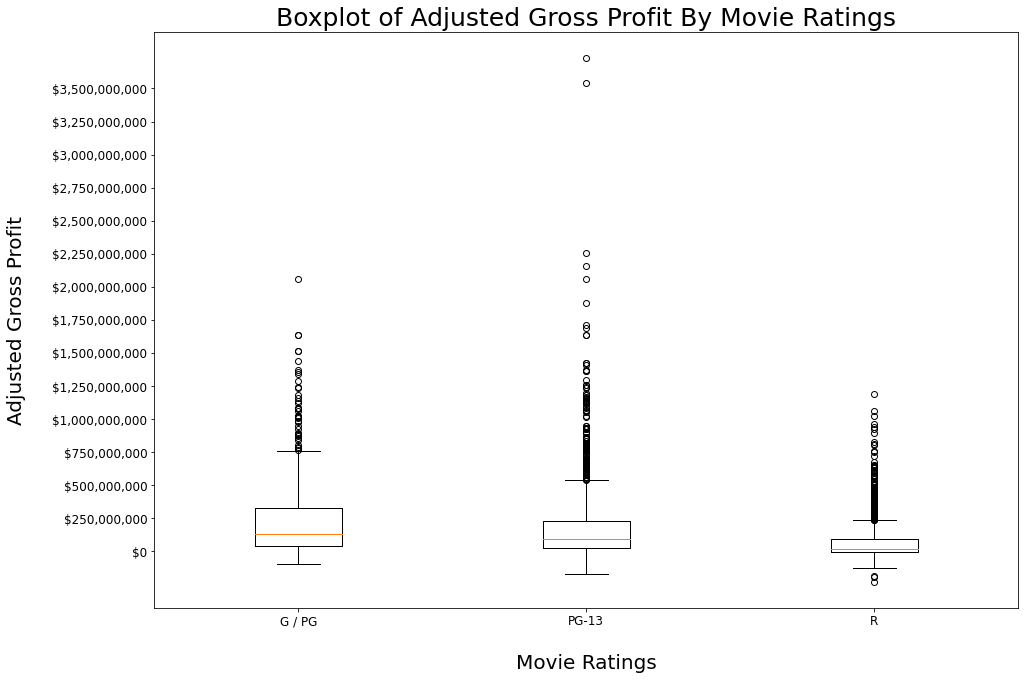

In [10]:
fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0,0,1,1]);

ratings = features['rating'].map({'PG/G' : 'G / PG',
                                  'PG-13' : 'PG-13',
                                  'R' : 'R'})

ax1.bar(ratings.value_counts().sort_values().index, 
        ratings.value_counts().sort_values().values);

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Movie Ratings Frequency', size = 25);
ax1.set_xlabel('\nMovie Ratings', size = 20);
ax1.set_ylabel('Frequency\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/hist_ratings.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 0, 1, 1]);

temp = pd.concat([ratings, targets], axis = 1)
temp_list = [temp[temp['rating'] == i]['gross_profit_adj'] for i in ratings.value_counts().sort_values().index]
ax1.boxplot(temp_list);
ax1.set_yticks(np.arange(0, targets.max(), 250000000));
ax1.set_yticklabels(ax1.get_yticks());
ax1.yaxis.set_major_formatter('${x:,.0f}')
ax1.set_xticklabels(ratings.value_counts().sort_values().index);

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Boxplot of Adjusted Gross Profit By Movie Ratings', size = 25);
ax1.set_xlabel('\nMovie Ratings', size = 20);
ax1.set_ylabel('Adjusted Gross Profit\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/box_ratings.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

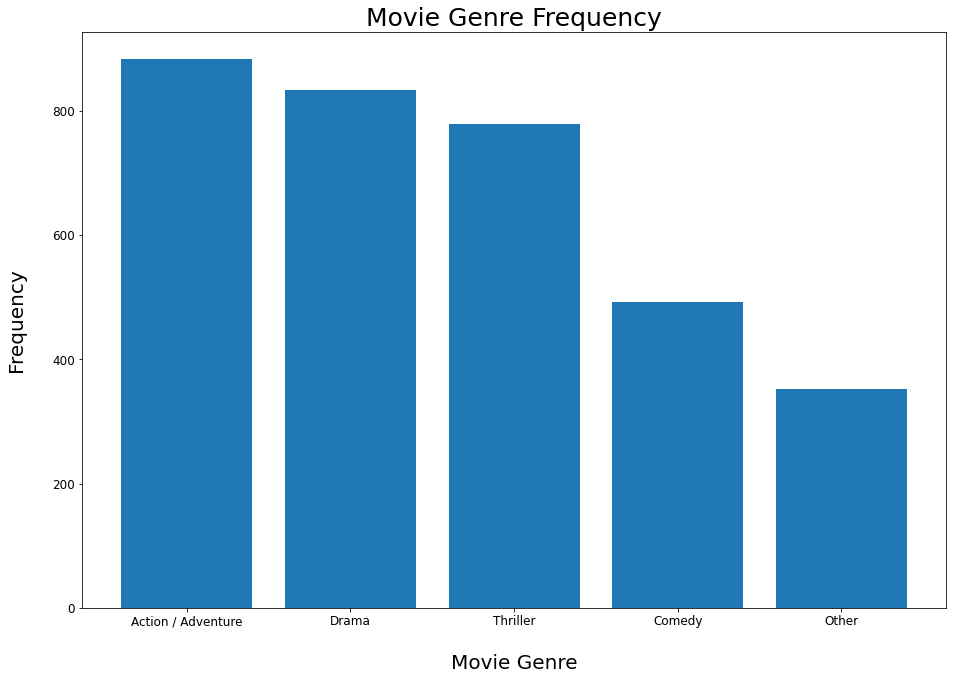

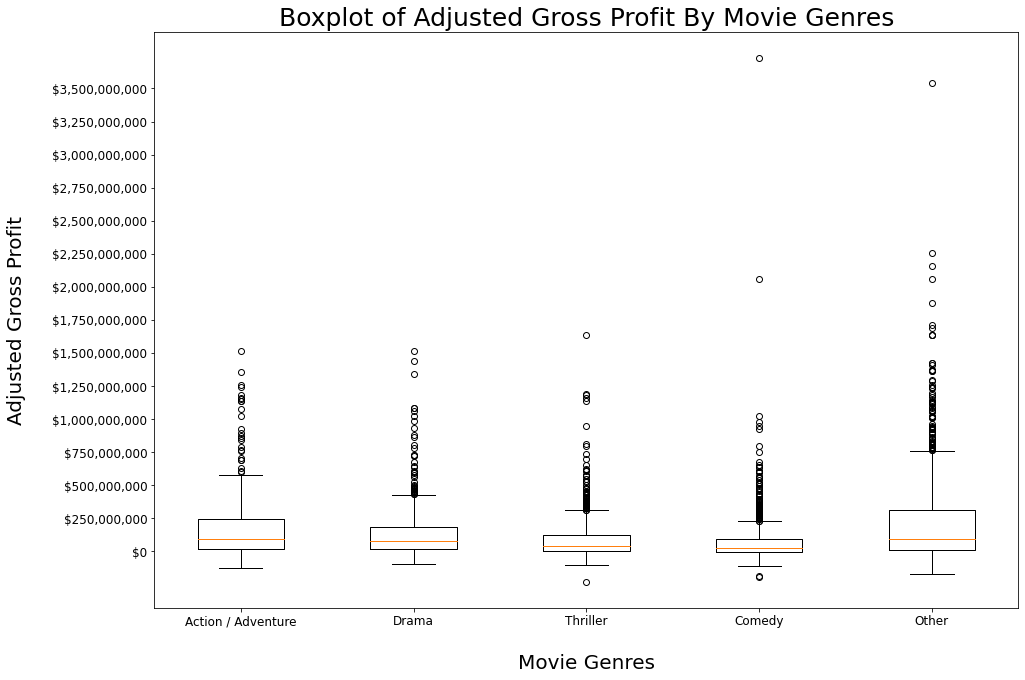

In [11]:
fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0,0,1,1]);

genres = features['new_genres'].map({'Action/Adventure' : 'Action / Adventure',
                                     'Drama' : 'Drama',
                                     'Thriller' : 'Thriller',
                                     'Comedy' : 'Comedy',
                                     'Misc' : 'Other'})

ax1.bar(genres.value_counts().sort_values(ascending = False).index, 
        genres.value_counts().sort_values(ascending = False).values);

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Movie Genre Frequency', size = 25);
ax1.set_xlabel('\nMovie Genre', size = 20);
ax1.set_ylabel('Frequency\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/hist_genres.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 0, 1, 1]);

temp = pd.concat([genres, targets], axis = 1)
temp_list = [temp[temp['new_genres'] == i]['gross_profit_adj'] for i in genres.value_counts().sort_values().index]
ax1.boxplot(temp_list);
ax1.set_yticks(np.arange(0, targets.max(), 250000000));
ax1.set_yticklabels(ax1.get_yticks());
ax1.yaxis.set_major_formatter('${x:,.0f}')
ax1.set_xticklabels(genres.value_counts().sort_values(ascending = False).index);

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Boxplot of Adjusted Gross Profit By Movie Genres', size = 25);
ax1.set_xlabel('\nMovie Genres', size = 20);
ax1.set_ylabel('Adjusted Gross Profit\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/box_genres.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

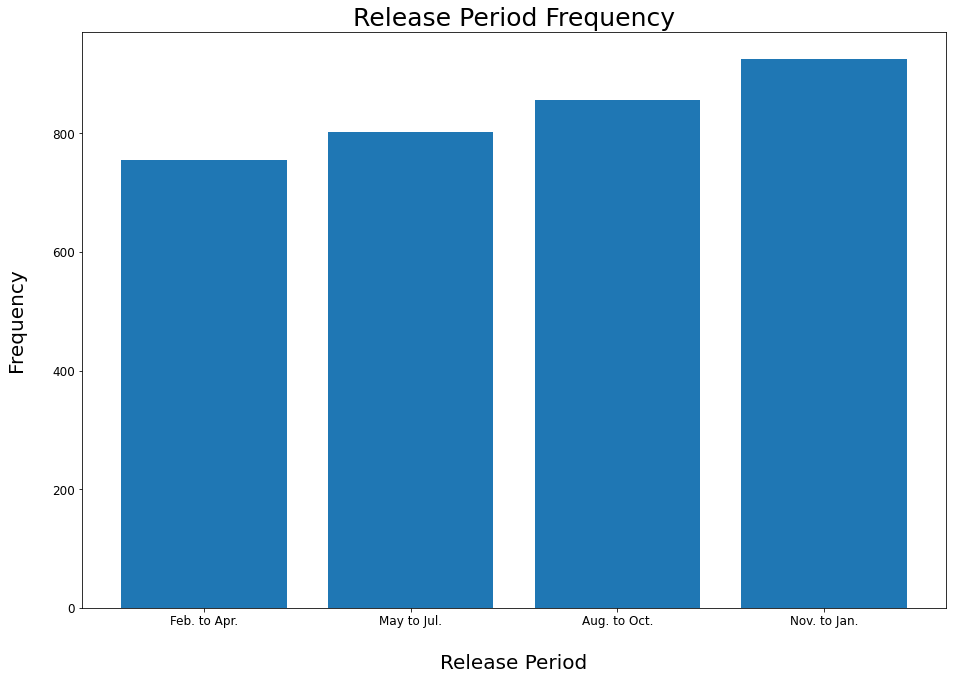

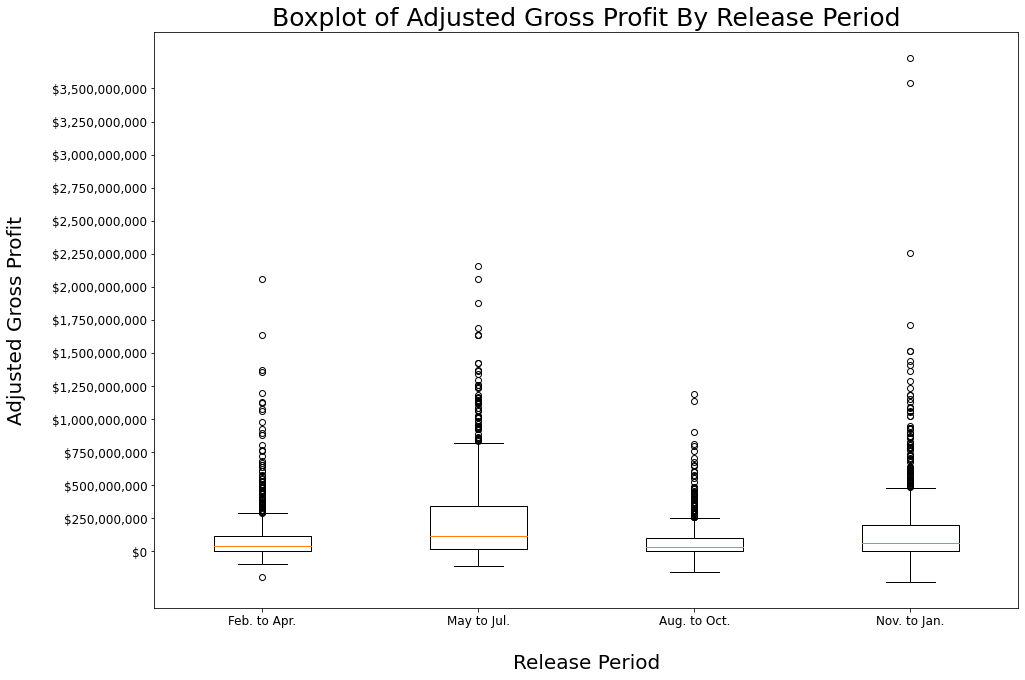

In [12]:
fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 1, 1, 1]);

release_period = features['release_month'].map({'nov_to_jan' : 'Nov. to Jan.',
                                                'aug_to_oct' : 'Aug. to Oct.',
                                                'may_to_july' : 'May to Jul.',
                                                'feb_to_apr' : 'Feb. to Apr.'})

ax1.bar(release_period.value_counts().sort_values().index, 
        release_period.value_counts().sort_values().values);

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Release Period Frequency', size = 25);
ax1.set_xlabel('\nRelease Period', size = 20);
ax1.set_ylabel('Frequency\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/hist_release_period.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 0, 1, 1]);

temp = pd.concat([release_period, targets], axis = 1)
temp_list = [temp[temp['release_month'] == i]['gross_profit_adj'] for i in release_period.value_counts().sort_values().index]
ax1.boxplot(temp_list);
ax1.set_yticks(np.arange(0, targets.max(), 250000000));
ax1.set_yticklabels(ax1.get_yticks());
ax1.yaxis.set_major_formatter('${x:,.0f}')
ax1.set_xticklabels(release_period.value_counts().sort_values().index);

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Boxplot of Adjusted Gross Profit By Release Period', size = 25);
ax1.set_xlabel('\nRelease Period', size = 20);
ax1.set_ylabel('Adjusted Gross Profit\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/box_release_period.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

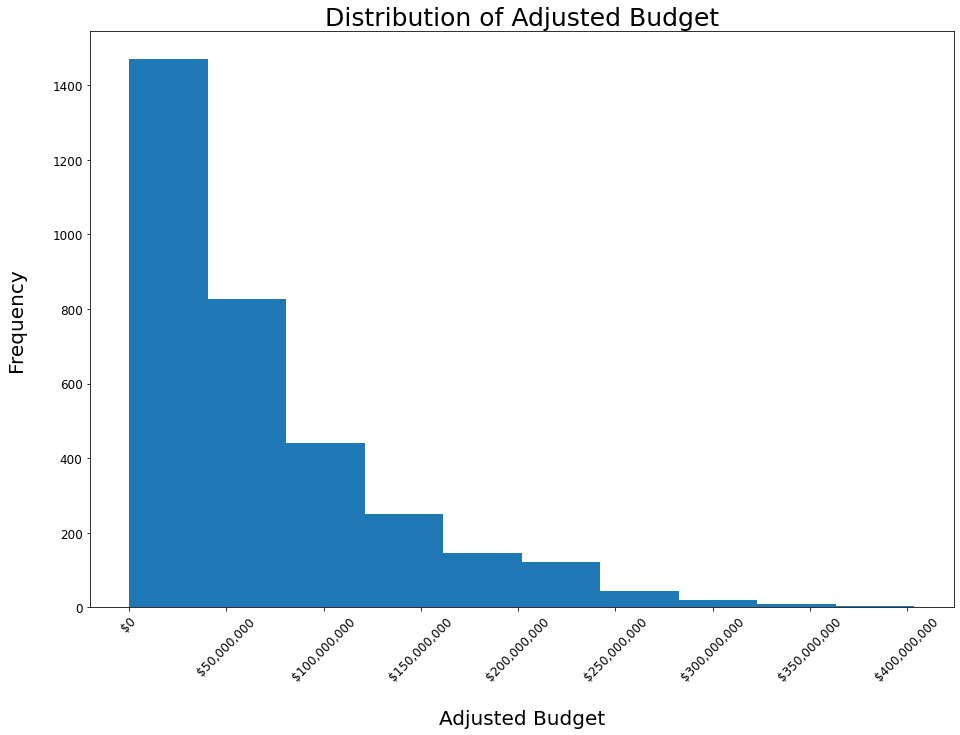

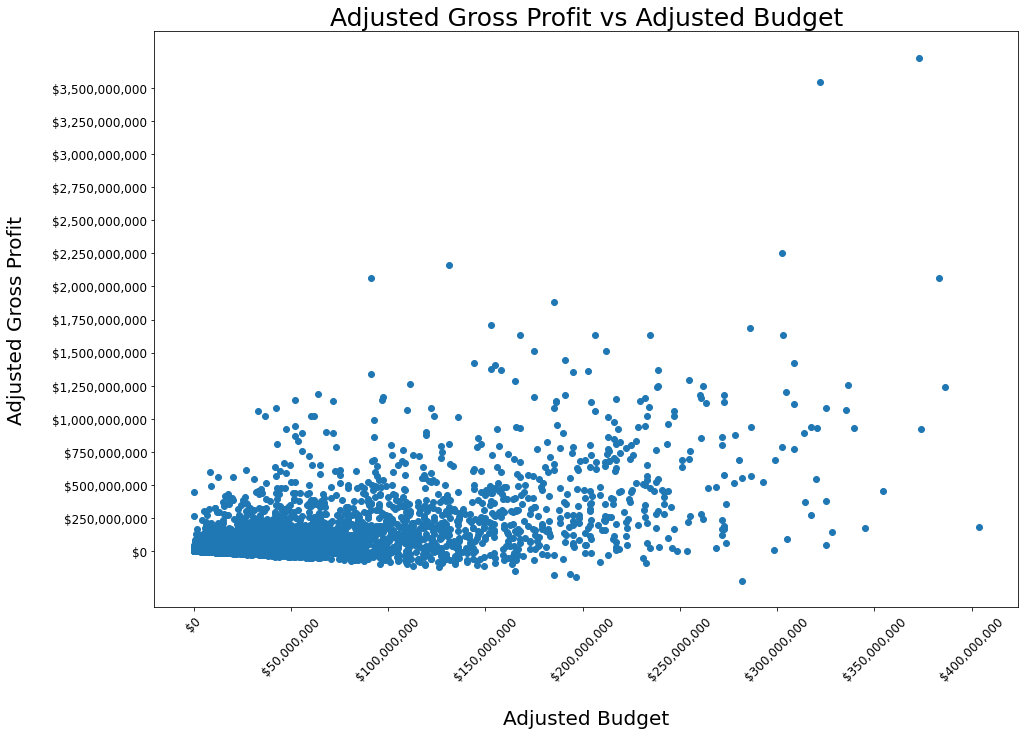

In [13]:
fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 0, 1, 1]);

ax1.hist(features['adj_budget']);
ax1.set_xticklabels(ax1.get_xticks(), rotation = 45);
ax1.xaxis.set_major_formatter('${x:,.0f}')

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Distribution of Adjusted Budget', size = 25);
ax1.set_xlabel('\nAdjusted Budget', size = 20);
ax1.set_ylabel('Frequency\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/hist_adj_budget.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 0, 1, 1]);

ax1.scatter(features['adj_budget'], targets);
ax1.set_xticklabels(ax1.get_xticks(), rotation = 45);
ax1.xaxis.set_major_formatter('${x:,.0f}')
ax1.set_yticks(np.arange(0, targets.max(), 250000000));
ax1.set_yticklabels(ax1.get_yticks());
ax1.yaxis.set_major_formatter('${x:,.0f}')

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Adjusted Gross Profit vs Adjusted Budget', size = 25);
ax1.set_xlabel('\nAdjusted Budget', size = 20);
ax1.set_ylabel('Adjusted Gross Profit\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/scatter_adj_budget.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

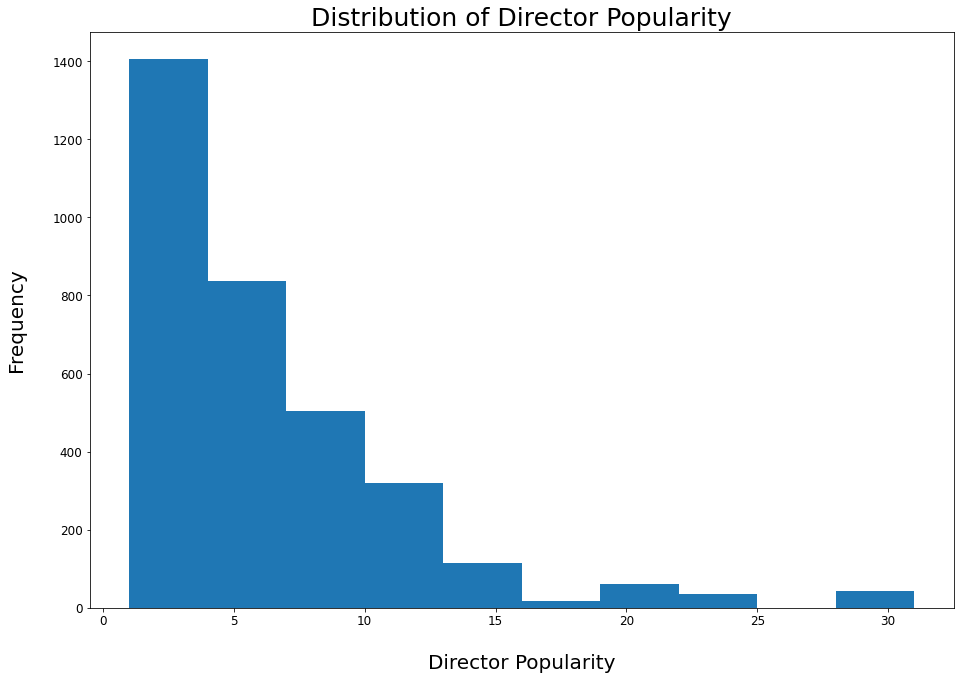

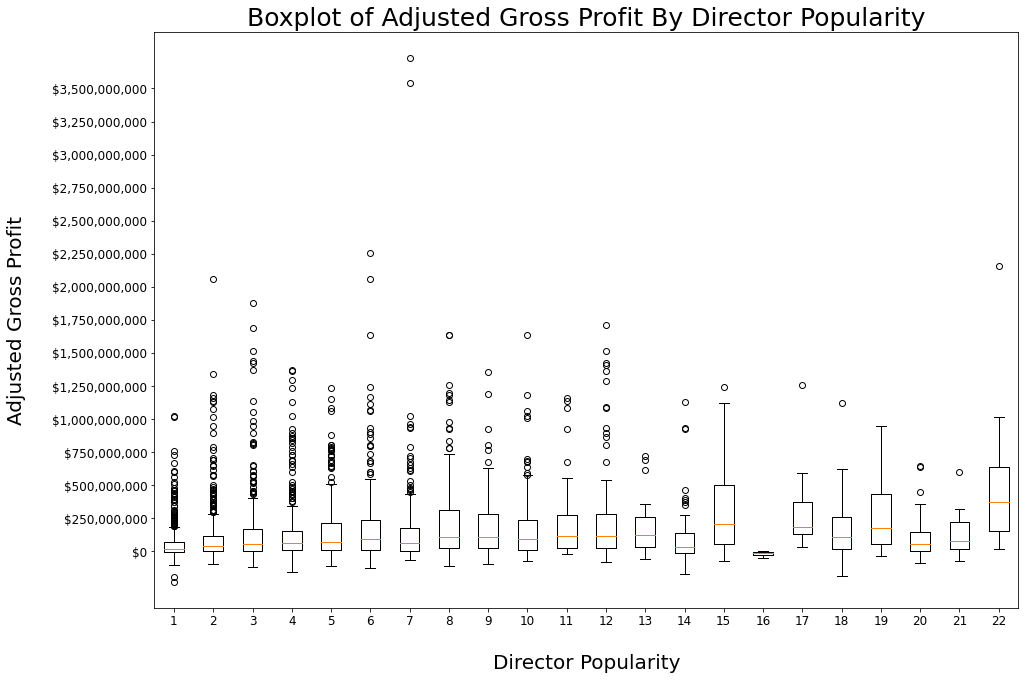

In [14]:
fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 0, 1, 1]);

ax1.hist(features['dir_pop']);

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Distribution of Director Popularity', size = 25);
ax1.set_xlabel('\nDirector Popularity', size = 20);
ax1.set_ylabel('Frequency\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/hist_dir_pop.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 0, 1, 1]);

temp = pd.concat([features['dir_pop'], targets], axis = 1)
temp_list = [temp[temp['dir_pop'] == i]['gross_profit_adj'] for i in features['dir_pop'].value_counts().sort_index().index]
ax1.boxplot(temp_list);
ax1.set_yticks(np.arange(0, targets.max(), 250000000));
ax1.set_yticklabels(ax1.get_yticks());
ax1.yaxis.set_major_formatter('${x:,.0f}')

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Boxplot of Adjusted Gross Profit By Director Popularity', size = 25);
ax1.set_xlabel('\nDirector Popularity', size = 20);
ax1.set_ylabel('Adjusted Gross Profit\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/box_dir_pop.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

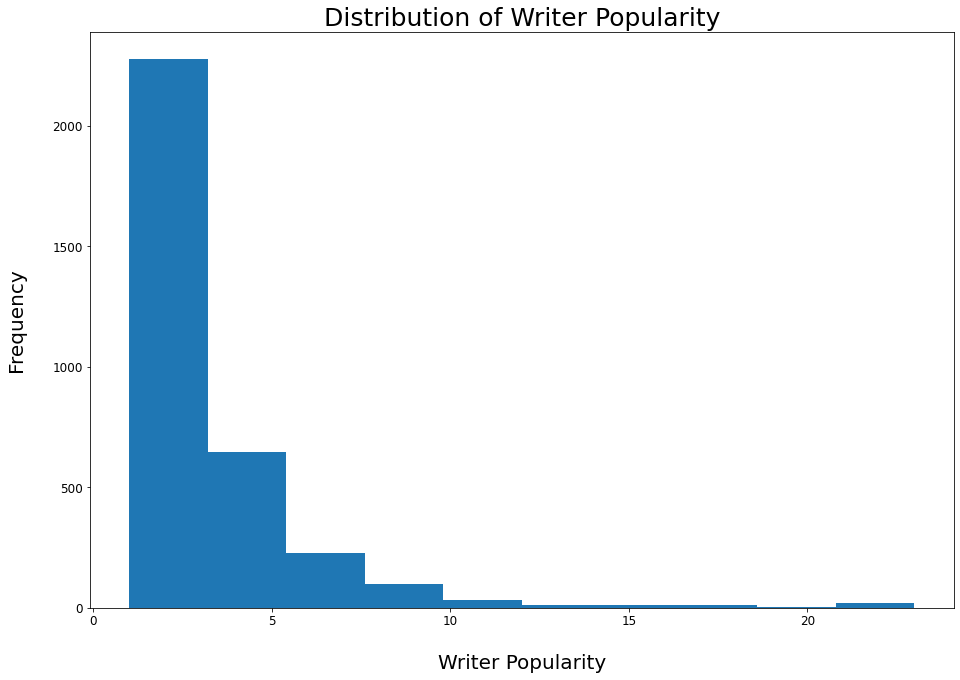

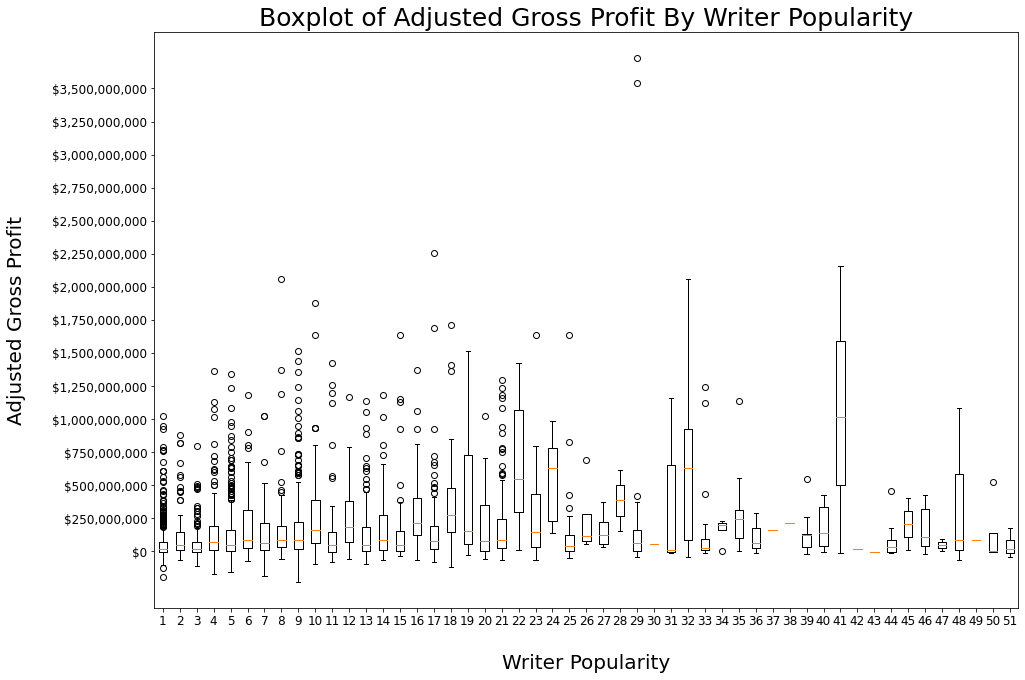

In [15]:
fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 0, 1, 1]);

ax1.hist(features['wr_pop']);

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Distribution of Writer Popularity', size = 25);
ax1.set_xlabel('\nWriter Popularity', size = 20);
ax1.set_ylabel('Frequency\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/hist_wr_pop.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 0, 1, 1]);

temp = pd.concat([features['wr_pop'], targets], axis = 1)
temp_list = [temp[temp['wr_pop'] == i]['gross_profit_adj'] for i in features['wr_pop'].value_counts().sort_index().index]
ax1.boxplot(temp_list);
ax1.set_yticks(np.arange(0, targets.max(), 250000000));
ax1.set_yticklabels(ax1.get_yticks());
ax1.yaxis.set_major_formatter('${x:,.0f}')

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Boxplot of Adjusted Gross Profit By Writer Popularity', size = 25);
ax1.set_xlabel('\nWriter Popularity', size = 20);
ax1.set_ylabel('Adjusted Gross Profit\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/box_wr_pop.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

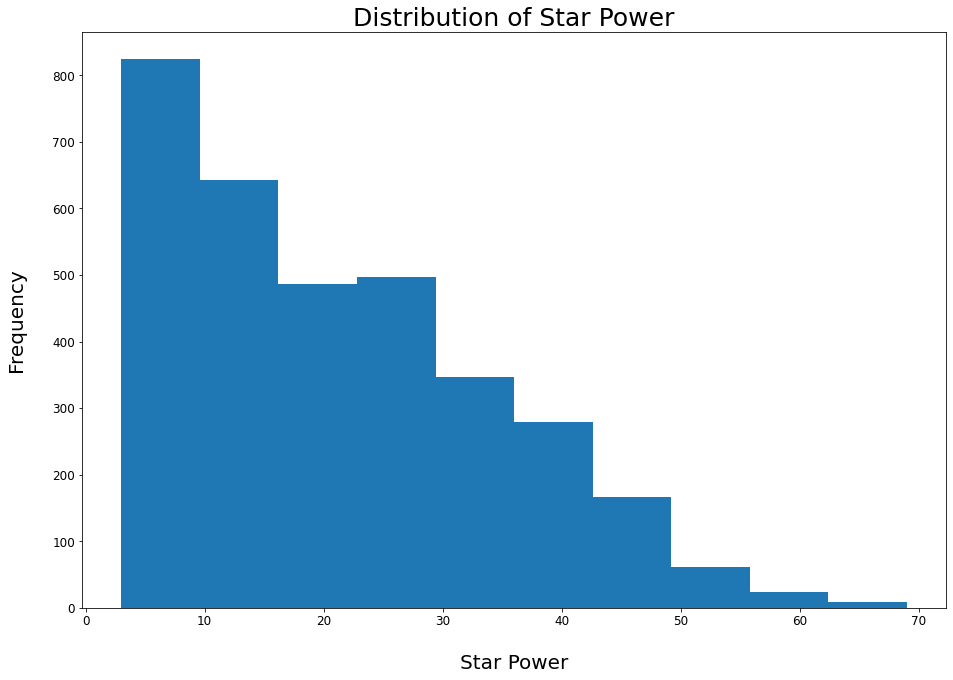

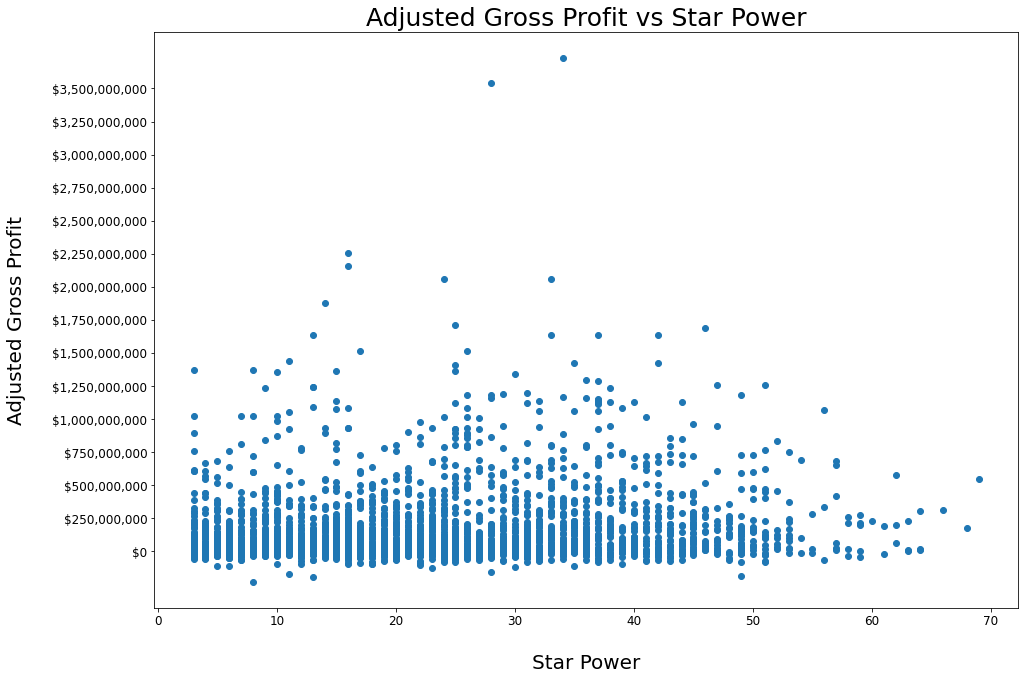

In [16]:
fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 0, 1, 1]);

ax1.hist(features['star_power']);

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Distribution of Star Power', size = 25);
ax1.set_xlabel('\nStar Power', size = 20);
ax1.set_ylabel('Frequency\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/hist_star_pwr.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 0, 1, 1]);

ax1.scatter(features['star_power'], targets);
ax1.set_yticks(np.arange(0, targets.max(), 250000000));
ax1.set_yticklabels(ax1.get_yticks());
ax1.yaxis.set_major_formatter('${x:,.0f}')

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Adjusted Gross Profit vs Star Power', size = 25);
ax1.set_xlabel('\nStar Power', size = 20);
ax1.set_ylabel('Adjusted Gross Profit\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/scatter_str_pwr.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

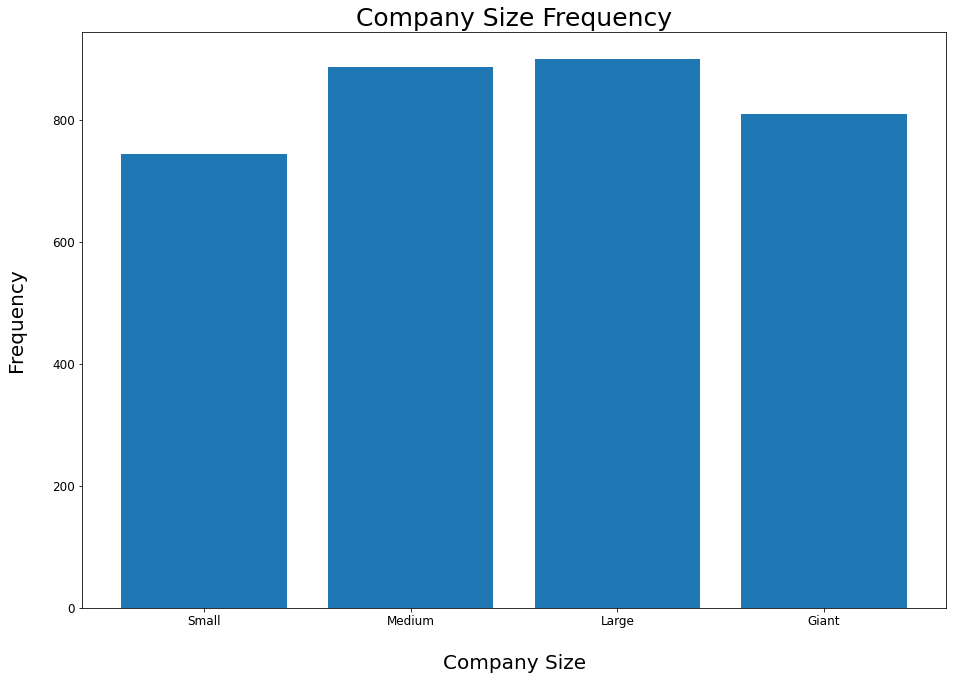

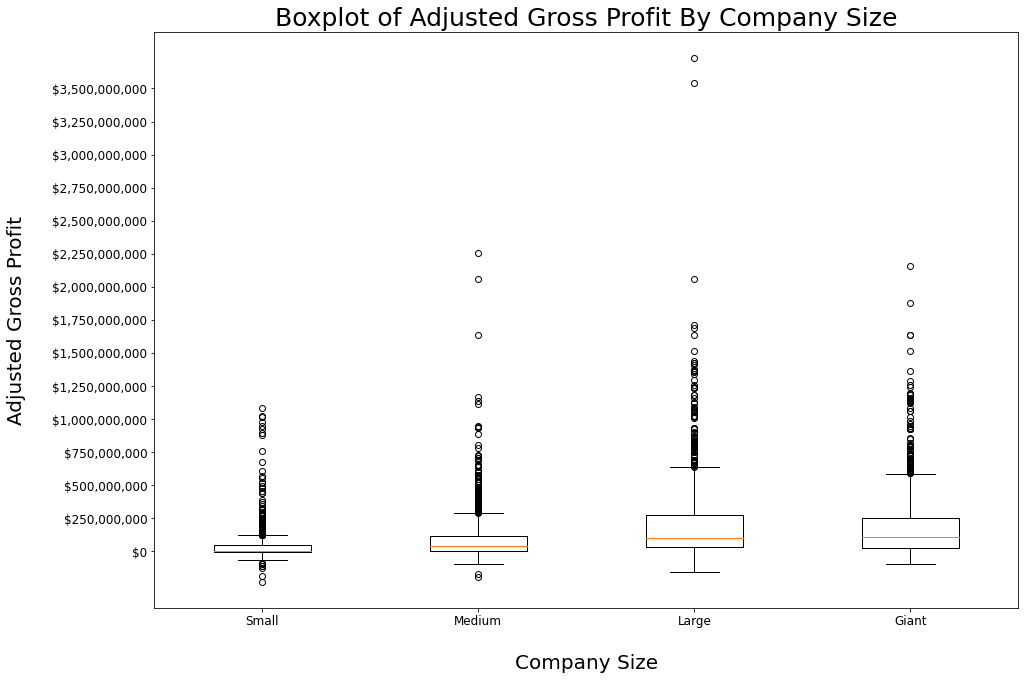

In [17]:
fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 1, 1, 1]);

company_size = features['company_size'].map({'small' : 'Small',
                                             'medium' : 'Medium',
                                             'large' : 'Large',
                                             'giant' : 'Giant'})

ax1.bar(company_size.value_counts().sort_index().index, 
        company_size.value_counts().sort_index().values);

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Company Size Frequency', size = 25);
ax1.set_xlabel('\nCompany Size', size = 20);
ax1.set_ylabel('Frequency\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/hist_cmpny_size.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')

fig1 = plt.figure();
fig1.set_size_inches(12, 8);
ax1 = fig1.add_axes([0, 0, 1, 1]);

temp = pd.concat([features['company_size'], targets], axis = 1)
temp_list = [temp[temp['company_size'] == i]['gross_profit_adj'] for i in features['company_size'].value_counts().sort_index().index]
ax1.boxplot(temp_list);
ax1.set_yticks(np.arange(0, targets.max(), 250000000));
ax1.set_yticklabels(ax1.get_yticks());
ax1.yaxis.set_major_formatter('${x:,.0f}')
ax1.set_xticklabels(company_size.value_counts().sort_index().index);

ax1.tick_params(axis = 'both', which = 'major', labelsize = 12);
ax1.set_title('Boxplot of Adjusted Gross Profit By Company Size', size = 25);
ax1.set_xlabel('\nCompany Size', size = 20);
ax1.set_ylabel('Adjusted Gross Profit\n', size = 20);

fig1.savefig('/Users/ajaypatel21/Downloads/STAT418_images/box_cmpny_size.png',
             bbox_inches = 'tight', pad_inches = 0.5, edgecolor = 'white')